In [1]:
import os
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 as cv
from keras import datasets, layers, models
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
Test_Parth = ".\Dataset\\test\."
Train_Parth = ".\Dataset\\train\."

In [3]:
train = ImageDataGenerator(rescale=1./255)
train_images = train.flow_from_directory(
    Train_Parth,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
)

Found 3115 images belonging to 36 classes.


In [4]:
test = ImageDataGenerator(rescale=1./255)
test_images = test.flow_from_directory(
    Test_Parth,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
)

Found 359 images belonging to 36 classes.


In [5]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [7]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
98/98 [==============================] - 124s 1s/step - loss: 1.7437 - accuracy: 0.5422
Epoch 2/5
98/98 [==============================] - 132s 1s/step - loss: 0.5773 - accuracy: 0.8199
Epoch 3/5
98/98 [==============================] - 131s 1s/step - loss: 0.3690 - accuracy: 0.8815
Epoch 4/5
98/98 [==============================] - 117s 1s/step - loss: 0.2337 - accuracy: 0.9274
Epoch 5/5
98/98 [==============================] - 118s 1s/step - loss: 0.1575 - accuracy: 0.9535


In [8]:
def chack(k,state):
    for i in train_images.class_indices:
        if train_images.class_indices[i] == k:
            print(state + i)
            break

Real image is cucumber
Pradict image is cucumber


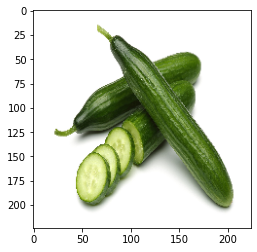

In [9]:
i =0
j = 2
image, lable = test_images[i]
lable = lable[j]
image = image[j]
chack(np.argmax(lable), "Real image is ")
plt.imshow(image)
lable1 = model.predict(np.array([image]))
chack(np.argmax(lable1), "Pradict image is ")

In [10]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


In [12]:
model.save_weights('Waight/my_checkpoint')

!model = keras.models.load_model("saved_model/my_model")